In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,NaN
1,NaN,NaN,NaN,0.27,0.5,0.0,0.53,NaN
2,0.64,0.62,0.49,NaN,NaN,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,NaN
4,NaN,0.44,0.48,NaN,0.5,NaN,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,NaN
1481,NaN,0.47,0.50,0.14,0.5,0.0,0.53,NaN
1482,0.51,0.45,NaN,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	444
float64		column 2	296
float64		column 3	297
float64		column 4	371
float64		column 5	223
float64		column 6	223
float64		column 7	222
float64		column 8	296


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1040.00000,1188.000000,1187.000000,1113.000000,1261.000000,1261.000000,1262.000000,1188.000000
mean,0.49825,0.497416,0.501676,0.258464,0.503965,0.007375,0.501204,0.273923
std,0.12032,0.115527,0.080722,0.125724,0.044367,0.076222,0.052823,0.100730
min,0.18000,0.160000,0.210000,0.000000,0.500000,0.000000,0.130000,0.010000
25%,0.42000,0.430000,0.470000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.49000,0.490000,0.510000,0.230000,0.500000,0.000000,0.510000,0.220000
75%,0.56000,0.560000,0.550000,0.300000,0.500000,0.000000,0.530000,0.290000
max,1.00000,0.940000,1.000000,0.870000,1.000000,0.830000,0.730000,0.990000


<AxesSubplot:>

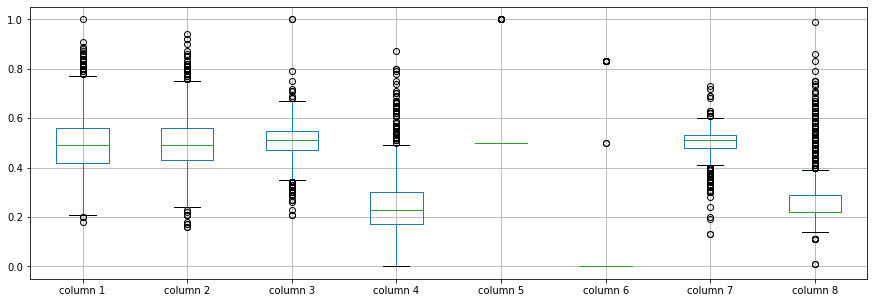

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.498250
column 2    0.497416
column 3    0.501676
column 4    0.258464
column 5    0.503965
column 6    0.007375
column 7    0.501204
column 8    0.273923
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.569840,-0.111534,0.168035,0.041401,0.031794,0.034589,-0.108849
column 2,0.569840,1.000000,-0.252186,0.150421,0.068308,-0.006213,0.077622,-0.112602
column 3,-0.111534,-0.252186,1.000000,0.079099,0.019636,-0.028922,-0.210946,-0.012196
column 4,0.168035,0.150421,0.079099,1.000000,0.022623,-0.023233,-0.109139,-0.125114
column 5,0.041401,0.068308,0.019636,0.022623,1.000000,-0.006437,0.058053,-0.011699
column 6,0.031794,-0.006213,-0.028922,-0.023233,-0.006437,1.000000,0.034769,-0.032360
column 7,0.034589,0.077622,-0.210946,-0.109139,0.058053,0.034769,1.000000,0.067773
column 8,-0.108849,-0.112602,-0.012196,-0.125114,-0.011699,-0.032360,0.067773,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+34,8+34+34,8+34+34+34,8+34+34+34+34,8+34+34+34+34+34,8+34+34+34+34+34+34,8+34+34+34+34+34,8+34+34+34+34,8+34+34+34,8+34+34,8+34,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.3542180981325065
Epoch: 1 , loss: 1.9593406254830568
Epoch: 2 , loss: 1.8110221831694893
Epoch: 3 , loss: 1.6850754255833833
Epoch: 4 , loss: 1.5794786525809246
Epoch: 5 , loss: 1.5053647549256035
Epoch: 6 , loss: 1.4595922646315203
Epoch: 7 , loss: 1.3732428110164145
Epoch: 8 , loss: 1.2967546957990397
Epoch: 9 , loss: 1.2652075180540914
Epoch: 10 , loss: 1.2288741138966188
Epoch: 11 , loss: 1.181617101897364
Epoch: 12 , loss: 1.1509132437084033
Epoch: 13 , loss: 1.1141628273155377
Epoch: 14 , loss: 1.087056982776393
Epoch: 15 , loss: 1.0618521655383317
Epoch: 16 , loss: 1.041980860673863
Epoch: 17 , loss: 1.0151672117088153
Epoch: 18 , loss: 1.001057915713476
Epoch: 19 , loss: 0.9844010796235956
Epoch: 20 , loss: 0.9606788177853045
Epoch: 21 , loss: 0.9567674152229143
Epoch: 22 , loss: 0.9437314161787862
Epoch: 23 , loss: 0.9148115677678067
Epoch: 24 , loss: 0.9066177451092264
Epoch: 25 , loss: 0.90

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.369897
column 2    0.440000
column 3    0.480000
column 4    0.220000
column 5    0.500000
column 6    0.000000
column 7    0.371456
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.031188
1,0.060757,-0.178029,0.017832,0.000000,0.000000,0.000000,0.0,0.044853
2,0.000000,0.000000,0.000000,0.003883,-0.218918,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.055396
4,0.138183,0.000000,0.000000,-0.257968,0.000000,0.000006,0.0,0.000000
...,...,...,...,...,...,...,...,...
1479,0.000000,-0.206043,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.412756
1481,-0.103324,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.192236
1482,0.000000,0.000000,-0.124980,0.000000,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(8.43529212383431, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.17984108548190536

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.490000
column 3    0.596396
column 4    0.230000
column 5    0.500000
column 6    0.000000
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.470000,0.130000,0.500000,0.000000,0.48,0.251188
1,0.490757,0.491971,0.497832,0.270000,0.500000,0.000000,0.53,0.264853
2,0.640000,0.620000,0.490000,0.153883,0.281082,0.000000,0.53,0.220000
3,0.580000,0.440000,0.570000,0.130000,0.500000,0.000000,0.54,0.275396
4,0.558183,0.440000,0.480000,0.282032,0.500000,0.000006,0.48,0.220000
...,...,...,...,...,...,...,...,...
1479,0.820000,0.423957,0.470000,0.180000,0.500000,0.000000,0.50,0.220000
1480,0.350000,0.290000,0.460000,0.140000,0.500000,0.000000,0.54,0.247244
1481,0.306676,0.470000,0.500000,0.140000,0.500000,0.000000,0.53,0.177764
1482,0.510000,0.450000,0.495020,0.250000,0.500000,0.000000,0.59,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NE_20(imp).xlsx", index=False, header=False)